In [1]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 42s 4us/step


In [2]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


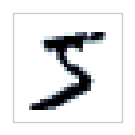

In [3]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
# 데이터 스케일링(2차원으로 변환, 숫자 float로 바꾸기
# 8bit라 0~255까지의 숫자를 가질 수 있다. 255로 나눠줌으로써 0~1사이의 수로 스케일링

X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [5]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
# y값 one-hot encoding
# keras 자체 Label Encoder가 있음
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

mean_squared_error : RSS

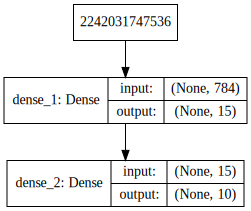

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


구해야할 parameter의 갯수를 알려줌

In [10]:
# 좀 더 자세하게 보고싶다면...
# layer별로..
l1 = model.layers[0]
l2 = model.layers[1]

In [11]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [12]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_2', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

In [13]:
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - acc: 0.2440 - val_loss: 0.0864 - val_acc: 0.3212
Epoch 2/30
 - 1s - loss: 0.0845 - acc: 0.3921 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 1s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 1s - loss: 0.0435 - 

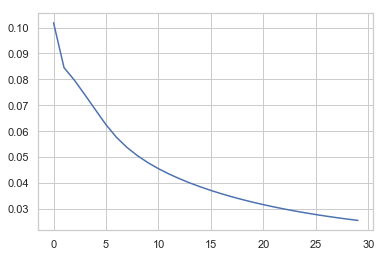

In [14]:
plt.plot(hist.history['loss'])
plt.show()

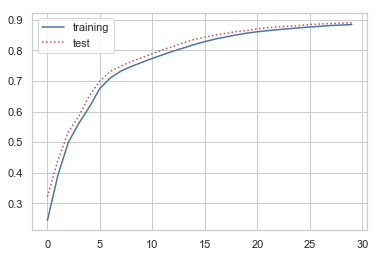

In [15]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [263]:
from sklearn.datasets import load_iris
iris = load_iris()

x = iris.data
y = iris.target[:,np.newaxis]

In [264]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y, 3)
Y_train[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [280]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(9, input_dim=4, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error', metrics=["accuracy"])

In [281]:
hist = model.fit(x, Y_train, epochs=50,verbose=2)

Epoch 1/50
 - 1s - loss: 0.2447 - acc: 0.3333
Epoch 2/50
 - 0s - loss: 0.2097 - acc: 0.4400
Epoch 3/50
 - 0s - loss: 0.2002 - acc: 0.6933
Epoch 4/50
 - 0s - loss: 0.1925 - acc: 0.7133
Epoch 5/50
 - 0s - loss: 0.1869 - acc: 0.7533
Epoch 6/50
 - 0s - loss: 0.1772 - acc: 0.8000
Epoch 7/50
 - 0s - loss: 0.1703 - acc: 0.7133
Epoch 8/50
 - 0s - loss: 0.1621 - acc: 0.7667
Epoch 9/50
 - 0s - loss: 0.1565 - acc: 0.7000
Epoch 10/50
 - 0s - loss: 0.1511 - acc: 0.6800
Epoch 11/50
 - 0s - loss: 0.1441 - acc: 0.7467
Epoch 12/50
 - 0s - loss: 0.1393 - acc: 0.7667
Epoch 13/50
 - 0s - loss: 0.1347 - acc: 0.7800
Epoch 14/50
 - 0s - loss: 0.1317 - acc: 0.7333
Epoch 15/50
 - 0s - loss: 0.1279 - acc: 0.8200
Epoch 16/50
 - 0s - loss: 0.1239 - acc: 0.9400
Epoch 17/50
 - 0s - loss: 0.1224 - acc: 0.7467
Epoch 18/50
 - 0s - loss: 0.1189 - acc: 0.8333
Epoch 19/50
 - 0s - loss: 0.1167 - acc: 0.8533
Epoch 20/50
 - 0s - loss: 0.1133 - acc: 0.8800
Epoch 21/50
 - 0s - loss: 0.1123 - acc: 0.8333
Epoch 22/50
 - 0s - lo

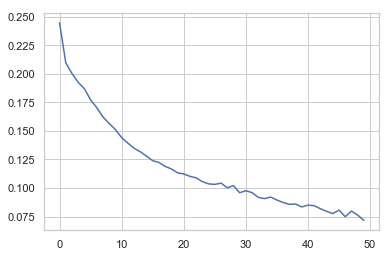

In [282]:
plt.plot(hist.history['loss'])
plt.show()

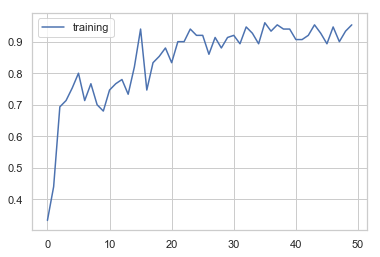

In [283]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.legend()
plt.show()

In [116]:
pred = model.predict(x)

In [117]:
result = model.predict_classes(x, verbose=0)

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, result)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]], dtype=int64)

In [108]:
from sklearn.datasets import fetch_olivetti_faces
face = fetch_olivetti_faces()

In [110]:
x = face.data
x.shape

(400, 4096)

In [119]:
face.target.shape

(400,)

### 연습문제 2
- SVM으로 먼저 돌리고
- keras로 돌려서 비교한다.

In [120]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    test_size=0.4, random_state=0)

In [122]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [124]:
accuracy_score(y_pred_train, y_train)

1.0

In [125]:
accuracy_score(y_pred_test, y_test)

0.925

In [134]:
faces.data.shape

(400, 4096)

In [135]:
set(faces.target) # k = 40

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

In [139]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
x = faces.data
y = faces.target[:,np.newaxis]

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.4, random_state=0)

In [252]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 40)
Y_test = np_utils.to_categorical(y_test, 40)
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [257]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

# hidden layer를 550번까지 할 필요는 없고 epochs는 굉장히 많이 올려줘야함.
model = Sequential()
model.add(Dense(550, input_dim=4096, activation="sigmoid"))
model.add(Dense(40, activation="sigmoid"))
model.compile(optimizer=SGD(lr=4.0), loss='mean_squared_error', metrics=["accuracy"])

In [258]:
hist = model.fit(X_train, Y_train, 
                 epochs=1000, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/1000
 - 1s - loss: 0.0599 - acc: 0.0292 - val_loss: 0.0247 - val_acc: 0.0125
Epoch 2/1000
 - 0s - loss: 0.0246 - acc: 0.0333 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 3/1000
 - 0s - loss: 0.0246 - acc: 0.0333 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 4/1000
 - 0s - loss: 0.0246 - acc: 0.0333 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 5/1000
 - 0s - loss: 0.0246 - acc: 0.0375 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 6/1000
 - 0s - loss: 0.0246 - acc: 0.0417 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 7/1000
 - 0s - loss: 0.0246 - acc: 0.0375 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 8/1000
 - 0s - loss: 0.0246 - acc: 0.0458 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 9/1000
 - 0s - loss: 0.0245 - acc: 0.0375 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 10/1000
 - 0s - loss: 0.0245 - acc: 0.0417 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 11/1000
 - 0s - loss: 0.0245 - acc: 0.0500 - val_loss: 0.0246 - val_acc: 0.0250
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.0237 - acc: 0.2000 - val_loss: 0.0246 - val_acc: 0.0437
Epoch 97/1000
 - 0s - loss: 0.0237 - acc: 0.1667 - val_loss: 0.0246 - val_acc: 0.0375
Epoch 98/1000
 - 0s - loss: 0.0237 - acc: 0.1875 - val_loss: 0.0245 - val_acc: 0.0437
Epoch 99/1000
 - 0s - loss: 0.0237 - acc: 0.1333 - val_loss: 0.0244 - val_acc: 0.0500
Epoch 100/1000
 - 0s - loss: 0.0236 - acc: 0.2042 - val_loss: 0.0244 - val_acc: 0.0688
Epoch 101/1000
 - 0s - loss: 0.0236 - acc: 0.1958 - val_loss: 0.0244 - val_acc: 0.0563
Epoch 102/1000
 - 0s - loss: 0.0236 - acc: 0.1625 - val_loss: 0.0245 - val_acc: 0.0500
Epoch 103/1000
 - 0s - loss: 0.0236 - acc: 0.1917 - val_loss: 0.0244 - val_acc: 0.0500
Epoch 104/1000
 - 0s - loss: 0.0236 - acc: 0.1833 - val_loss: 0.0244 - val_acc: 0.0563
Epoch 105/1000
 - 0s - loss: 0.0236 - acc: 0.2042 - val_loss: 0.0245 - val_acc: 0.0563
Epoch 106/1000
 - 0s - loss: 0.0236 - acc: 0.1667 - val_loss: 0.0244 - val_acc: 0.0688
Epoch 107/1000
 - 0s - loss: 0.0235 - acc: 0.17

Epoch 191/1000
 - 0s - loss: 0.0190 - acc: 0.4167 - val_loss: 0.0225 - val_acc: 0.2500
Epoch 192/1000
 - 0s - loss: 0.0189 - acc: 0.4167 - val_loss: 0.0228 - val_acc: 0.1688
Epoch 193/1000
 - 0s - loss: 0.0189 - acc: 0.4125 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 194/1000
 - 0s - loss: 0.0188 - acc: 0.4250 - val_loss: 0.0225 - val_acc: 0.1875
Epoch 195/1000
 - 0s - loss: 0.0186 - acc: 0.4292 - val_loss: 0.0225 - val_acc: 0.2000
Epoch 196/1000
 - 0s - loss: 0.0186 - acc: 0.4333 - val_loss: 0.0222 - val_acc: 0.2250
Epoch 197/1000
 - 0s - loss: 0.0185 - acc: 0.4375 - val_loss: 0.0229 - val_acc: 0.2000
Epoch 198/1000
 - 0s - loss: 0.0185 - acc: 0.4500 - val_loss: 0.0223 - val_acc: 0.1938
Epoch 199/1000
 - 0s - loss: 0.0185 - acc: 0.4417 - val_loss: 0.0227 - val_acc: 0.1812
Epoch 200/1000
 - 0s - loss: 0.0183 - acc: 0.4542 - val_loss: 0.0224 - val_acc: 0.2188
Epoch 201/1000
 - 0s - loss: 0.0183 - acc: 0.4708 - val_loss: 0.0223 - val_acc: 0.2125
Epoch 202/1000
 - 0s - loss: 0.0182 - acc: 

 - 0s - loss: 0.0127 - acc: 0.7292 - val_loss: 0.0180 - val_acc: 0.4750
Epoch 286/1000
 - 0s - loss: 0.0126 - acc: 0.7583 - val_loss: 0.0179 - val_acc: 0.4750
Epoch 287/1000
 - 0s - loss: 0.0125 - acc: 0.7333 - val_loss: 0.0183 - val_acc: 0.4562
Epoch 288/1000
 - 0s - loss: 0.0124 - acc: 0.7250 - val_loss: 0.0179 - val_acc: 0.5312
Epoch 289/1000
 - 0s - loss: 0.0124 - acc: 0.7417 - val_loss: 0.0180 - val_acc: 0.4938
Epoch 290/1000
 - 0s - loss: 0.0123 - acc: 0.7458 - val_loss: 0.0179 - val_acc: 0.5000
Epoch 291/1000
 - 0s - loss: 0.0122 - acc: 0.7708 - val_loss: 0.0180 - val_acc: 0.4875
Epoch 292/1000
 - 0s - loss: 0.0121 - acc: 0.7792 - val_loss: 0.0181 - val_acc: 0.4875
Epoch 293/1000
 - 0s - loss: 0.0121 - acc: 0.7542 - val_loss: 0.0176 - val_acc: 0.5188
Epoch 294/1000
 - 0s - loss: 0.0120 - acc: 0.7792 - val_loss: 0.0179 - val_acc: 0.5125
Epoch 295/1000
 - 0s - loss: 0.0119 - acc: 0.7833 - val_loss: 0.0175 - val_acc: 0.5062
Epoch 296/1000
 - 0s - loss: 0.0119 - acc: 0.7792 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0075 - acc: 0.8875 - val_loss: 0.0140 - val_acc: 0.6375
Epoch 381/1000
 - 0s - loss: 0.0075 - acc: 0.9000 - val_loss: 0.0138 - val_acc: 0.6625
Epoch 382/1000
 - 0s - loss: 0.0074 - acc: 0.8917 - val_loss: 0.0137 - val_acc: 0.6438
Epoch 383/1000
 - 0s - loss: 0.0073 - acc: 0.9042 - val_loss: 0.0136 - val_acc: 0.6813
Epoch 384/1000
 - 0s - loss: 0.0073 - acc: 0.8917 - val_loss: 0.0139 - val_acc: 0.6375
Epoch 385/1000
 - 0s - loss: 0.0072 - acc: 0.8958 - val_loss: 0.0137 - val_acc: 0.6687
Epoch 386/1000
 - 0s - loss: 0.0072 - acc: 0.8958 - val_loss: 0.0138 - val_acc: 0.6438
Epoch 387/1000
 - 0s - loss: 0.0073 - acc: 0.8875 - val_loss: 0.0134 - val_acc: 0.6875
Epoch 388/1000
 - 0s - loss: 0.0072 - acc: 0.9042 - val_loss: 0.0134 - val_acc: 0.6750
Epoch 389/1000
 - 0s - loss: 0.0071 - acc: 0.9083 - val_loss: 0.0139 - val_acc: 0.6500
Epoch 390/1000
 - 0s - loss: 0.0071 - acc: 0.9042 - val_loss: 0.0133 - val_acc: 0.7188
Epoch 391/1000
 - 0s - loss: 0.0070 - acc: 

 - 0s - loss: 0.0043 - acc: 0.9667 - val_loss: 0.0103 - val_acc: 0.8063
Epoch 475/1000
 - 0s - loss: 0.0043 - acc: 0.9708 - val_loss: 0.0108 - val_acc: 0.7562
Epoch 476/1000
 - 0s - loss: 0.0043 - acc: 0.9750 - val_loss: 0.0106 - val_acc: 0.8063
Epoch 477/1000
 - 0s - loss: 0.0043 - acc: 0.9708 - val_loss: 0.0103 - val_acc: 0.7875
Epoch 478/1000
 - 0s - loss: 0.0043 - acc: 0.9833 - val_loss: 0.0101 - val_acc: 0.7875
Epoch 479/1000
 - 0s - loss: 0.0042 - acc: 0.9792 - val_loss: 0.0103 - val_acc: 0.8000
Epoch 480/1000
 - 0s - loss: 0.0042 - acc: 0.9792 - val_loss: 0.0103 - val_acc: 0.7875
Epoch 481/1000
 - 0s - loss: 0.0042 - acc: 0.9708 - val_loss: 0.0104 - val_acc: 0.7875
Epoch 482/1000
 - 0s - loss: 0.0041 - acc: 0.9750 - val_loss: 0.0100 - val_acc: 0.8000
Epoch 483/1000
 - 0s - loss: 0.0041 - acc: 0.9708 - val_loss: 0.0100 - val_acc: 0.7875
Epoch 484/1000
 - 0s - loss: 0.0040 - acc: 0.9708 - val_loss: 0.0102 - val_acc: 0.8187
Epoch 485/1000
 - 0s - loss: 0.0041 - acc: 0.9833 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 570/1000
 - 0s - loss: 0.0024 - acc: 0.9958 - val_loss: 0.0084 - val_acc: 0.8750
Epoch 571/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 0.8812
Epoch 572/1000
 - 0s - loss: 0.0023 - acc: 0.9958 - val_loss: 0.0083 - val_acc: 0.8375
Epoch 573/1000
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 574/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 575/1000
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 0.8063
Epoch 576/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 577/1000
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 578/1000
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 0.8500
Epoch 579/1000
 - 0s - loss: 0.0022 - acc: 0.9958 - val_loss: 0.0078 - val_acc: 0.8688
Epoch 580/1000
 - 0s - loss: 0.0022 - acc: 

 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.8938
Epoch 664/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8938
Epoch 665/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8812
Epoch 666/1000
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8875
Epoch 667/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.8750
Epoch 668/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9000
Epoch 669/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9000
Epoch 670/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8812
Epoch 671/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.8812
Epoch 672/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8938
Epoch 673/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.8938
Epoch 674/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_lo

 - 0s - loss: 8.7576e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9062
Epoch 757/1000
 - 0s - loss: 8.6057e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.8938
Epoch 758/1000
 - 0s - loss: 8.5901e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9062
Epoch 759/1000
 - 0s - loss: 8.6009e-04 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 0.8812
Epoch 760/1000
 - 0s - loss: 8.8923e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9125
Epoch 761/1000
 - 0s - loss: 8.6636e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9000
Epoch 762/1000
 - 0s - loss: 8.5311e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.8938
Epoch 763/1000
 - 0s - loss: 8.5387e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 764/1000
 - 0s - loss: 8.4388e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 765/1000
 - 0s - loss: 8.4434e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 766/1000
 - 0s - loss: 8.4709e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9187
Epoch 767/1000

Epoch 847/1000
 - 0s - loss: 6.2099e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 848/1000
 - 0s - loss: 6.2787e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 849/1000
 - 0s - loss: 6.1547e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 850/1000
 - 0s - loss: 6.2112e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9250
Epoch 851/1000
 - 0s - loss: 6.1194e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9187
Epoch 852/1000
 - 0s - loss: 6.0881e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9250
Epoch 853/1000
 - 0s - loss: 6.1393e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9125
Epoch 854/1000
 - 0s - loss: 6.0679e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9062
Epoch 855/1000
 - 0s - loss: 5.9941e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9062
Epoch 856/1000
 - 0s - loss: 6.1495e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9125
Epoch 857/1000
 - 0s - loss: 6.0425e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9000

 - 0s - loss: 4.7778e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9125
Epoch 938/1000
 - 0s - loss: 4.7298e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 939/1000
 - 0s - loss: 4.7522e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9187
Epoch 940/1000
 - 0s - loss: 4.7244e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9125
Epoch 941/1000
 - 0s - loss: 4.6714e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9313
Epoch 942/1000
 - 0s - loss: 4.6836e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9125
Epoch 943/1000
 - 0s - loss: 4.6822e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 944/1000
 - 0s - loss: 4.6803e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9250
Epoch 945/1000
 - 0s - loss: 4.6485e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9313
Epoch 946/1000
 - 0s - loss: 4.6535e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 947/1000
 - 0s - loss: 4.6403e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 948/1000

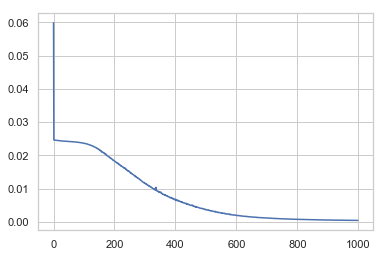

In [259]:
plt.plot(hist.history['loss'])
plt.show()

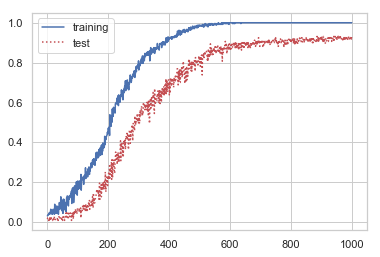

In [260]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()